In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


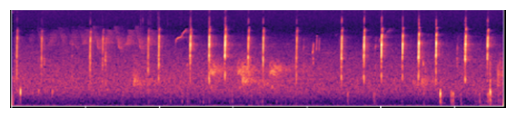

In [25]:
import matplotlib.pyplot as plt

# load origenal image
image = plt.imread('/content/drive/MyDrive/image.jpg')

# show image
plt.imshow(image)
plt.axis('off')
plt.show()

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the gradient of the image
gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the amplitude and direction of the gradient
gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
gradient_angle = np.arctan2(gradient_y, gradient_x)


gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
_, gradient_binary = cv2.threshold(gradient_magnitude_normalized, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Calculate the area boundary box of the image
contours, _ = cv2.findContours(gradient_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Segmentation using BING algorithm
algorithm = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
algorithm.setBaseImage(image)
algorithm.switchToSelectiveSearchFast()
rectangles = algorithm.process()


for rectangle in rectangles:
    x, y, w, h = rectangle
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)




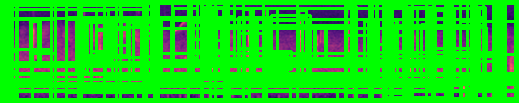

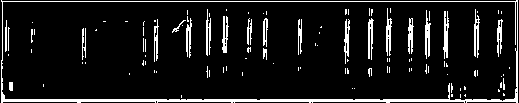

In [24]:
# Displays the original image and segmentation results
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(gradient_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()